In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

262144


/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_15953/1059582253.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  I = I-np.min(I, None)+1 # avoid negative values


OverflowError: Python integer 229601394 out of bounds for int16

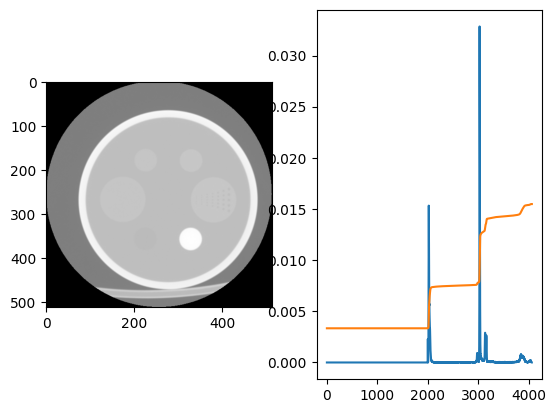

In [2]:
I = imageio.v2.imread("../data/phantom_15.dcm")
I = I-np.min(I, None)+1 # avoid negative values

p = np.max(I, None) # image depth
N = I.shape[0]*I.shape[1]
print(N)

# histogram of original image
counts, bins = np.histogram(I, bins = p)

# normalized CDF
CDF = (p/N)*np.cumsum(counts)
# visualize
fig, ax = plt.subplots(1,2)
ax[0].imshow(I, cmap = "gray")
ax[1].plot(counts[2:]/np.sum(counts, None))
ax[1].plot(CDF[2:]/np.sum(counts, None))

rows, cols = I.shape
# apply equalization filter
Ieq = np.zeros_like(I)
for i in range(rows):
    for j in range(cols):
        Ieq[i,j]=int(N*CDF[int(I[i,j])])

counts, bins = np.histogram(Ieq, bins = p)
fig, ax = plt.subplots(1,2)
ax[0].imshow(Ieq, cmap = "gray")
ax[1].hist(counts, bins)
plt.show()

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_15953/6821278.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = imageio.imread("../data/phantom_15.dcm").astype(np.int32)
/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_15953/6821278.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  I = I - I.min()  # shift to start at 0


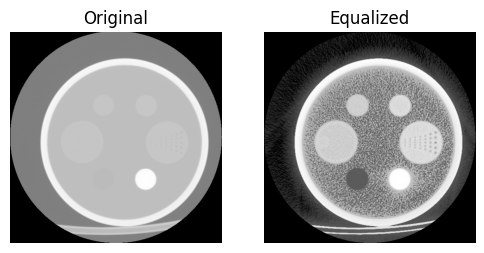

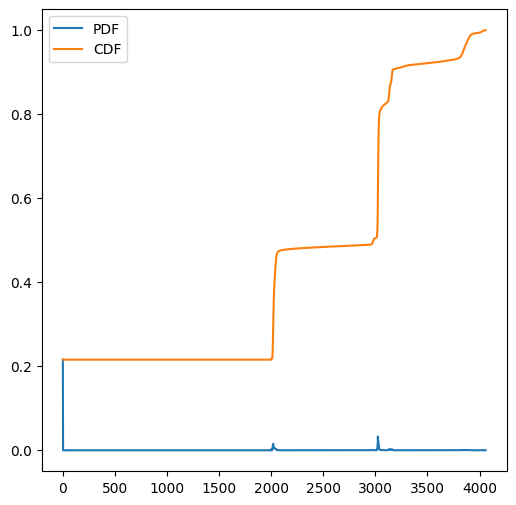

In [3]:
I = imageio.imread("../data/phantom_15.dcm").astype(np.int32)
I = I - I.min()  # shift to start at 0

L = int(I.max()) + 1               # number of gray levels
N = I.size

counts = np.bincount(I.ravel(), minlength=L)
cdf = counts.cumsum()
cdf_norm = cdf / cdf[-1]           # in [0,1]

# mapping to [0, L-1]
mapping = np.floor((L - 1) * cdf_norm).astype(np.int32)

Ieq = mapping[I]                   # vectorized, no loops, no overflow

fig, ax = plt.subplots(1, 2, figsize=(6, 6))
ax[0].imshow(I, cmap="gray");   ax[0].set_title("Original"); ax[0].axis("off")
ax[1].imshow(Ieq, cmap="gray"); ax[1].set_title("Equalized"); ax[1].axis("off")
fig, ax = plt.subplots(1,1, figsize = (6, 6))
ax.plot(counts / counts.sum(), label="PDF")
ax.plot(cdf_norm, label="CDF")
ax.legend()
plt.show()
